In [1]:
import pandas as pd

Loading dataset

In [2]:
df_train = pd.read_feather("../../../data/processed/CLTP_train_set.feather")

In [3]:
df_train.shape

(2225672, 105)

In [4]:
df_train.head()

,ORIGEN,SEXO,TIPO_PERSONA,CLIENTE,ANO_DE_NACIMIENTO,FECHA_NACIMIENTO,ESTADO_CIVIL,DATECO_TRABAJA,DATECO_AUTONOMO,DATECO_RAZON_SOCIAL_EMPLEADOR,...,5__COBRO_SJ,6__COBRO_SJ,polizas_1,polizas_2,polizas_3,polizas_4,polizas_5,polizas_6,CLTP,time_window
0,082,M,F,None,1973.0,28/06/1973,Soltero,None,None,None,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0,1 a 6
1,082,M,F,None,1941.0,22/01/1941,Soltero,None,None,None,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0,1 a 6
2,082,M,F,None,NaN,None,None,None,None,None,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0,1 a 6
3,082,M,F,None,1938.0,13/05/1938,Soltero,None,None,None,...,NaN,NaN,3.0,3.0,3.0,3.0,3.0,1.0,0,1 a 6
4,082,M,F,None,1953.0,26/10/1953,Casado,None,None,None,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0,1 a 6


In [5]:
X_train = df_train.drop(["CLTP"], axis=1)
y_train = df_train["CLTP"]
del df_train

In [6]:
y_train.value_counts(normalize=True)

0    0.860303
1    0.029497
2    0.026687
3    0.024976
4    0.020800
5    0.019600
6    0.018137
Name: CLTP, dtype: float64

## Training

In [7]:
from sklearn.utils.class_weight import compute_class_weight 

In [8]:
compute_class_weight("balanced", sorted(y_train.unique()), y_train)

array([0.16605439, 4.84315526, 5.35310699, 5.7198162 , 6.86812854,
       7.28865834, 7.876366  ])

In [9]:
weights = {
    0: 1,
    1: 5,
    2: 5,
    3: 10,
    4: 30,
    5: 30,
    6: 30,
}

Dummify 

In [10]:
X_train = X_train.drop(["DATECO_RAZON_SOCIAL_EMPLEADOR","FECHA_NACIMIENTO","time_window"], axis=1)

In [11]:
X_train = pd.get_dummies(X_train)

In [12]:
X_train = X_train.fillna(-999)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, class_weight=weights, n_jobs=-1, verbose=2)
rf.fit(X_train, y_train)  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50building tree 2 of 50building tree 3 of 50building tree 4 of 50building tree 5 of 50building tree 6 of 50





building tree 7 of 50building tree 8 of 50

building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.7min


building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.6min finished


RandomForestClassifier(bootstrap=True,
            class_weight={0: 1, 1: 5, 2: 5, 3: 10, 4: 30, 5: 30, 6: 30},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=2, warm_start=False)

Dump training columns

In [14]:
cols = list(X_train.columns)

In [15]:
import pickle
with open('../../../src/models/Training columns - CLTP - Primer modelo basico - dummies.md', 'wb') as file:
    pickle.dump(cols, file, pickle.HIGHEST_PROTOCOL)

### Feature importance

In [16]:
pd.DataFrame(rf.feature_importances_,index=X_train.columns, columns=['importance']
                                   ).sort_values('importance', ascending=False).iloc[0:20].plot.bar()

### Validation Dataset

In [17]:
df_val = pd.read_feather("../../../data/processed/CLTP_test_set.feather")

In [18]:
df_val.shape

(1439233, 105)

In [19]:
df_val.head()

,ORIGEN,SEXO,TIPO_PERSONA,CLIENTE,ANO_DE_NACIMIENTO,FECHA_NACIMIENTO,ESTADO_CIVIL,DATECO_TRABAJA,DATECO_AUTONOMO,DATECO_RAZON_SOCIAL_EMPLEADOR,...,5__COBRO_SJ,6__COBRO_SJ,polizas_1,polizas_2,polizas_3,polizas_4,polizas_5,polizas_6,CLTP,time_window
0,082,M,F,None,1973.0,28/06/1973,Soltero,None,None,None,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0,6 a 11
1,082,M,F,None,1941.0,22/01/1941,Soltero,None,None,None,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0,6 a 11
2,082,M,F,None,NaN,None,None,None,None,None,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0,6 a 11
3,082,M,F,None,1938.0,13/05/1938,Soltero,None,None,None,...,NaN,NaN,1.0,1.0,1.0,0.0,1.0,1.0,0,6 a 11
4,082,M,F,None,1953.0,26/10/1953,Casado,None,None,None,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0,6 a 11


### Model metrics

In [20]:
from sklearn.metrics import roc_auc_score,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

In [21]:
X_val = df_val.drop(["CLTP"], axis=1)
y_val = df_val["CLTP"]
del df_val

In [22]:
X_val = X_val.drop(["DATECO_RAZON_SOCIAL_EMPLEADOR","FECHA_NACIMIENTO","time_window"], axis=1)
X_val = pd.get_dummies(X_val)
X_val = X_val.fillna(-999)

In [23]:
[col for col in X_val.columns if col not in X_train.columns]

['ORIGEN_1254311',
 'ORIGEN_125514',
 'ORIGEN_525',
 'ORIGEN_FIACREOB18',
 'ORIGEN_FIAOTR0918',
 'ORIGEN_FIAOTR1018',
 'ORIGEN_FIAOTR1118',
 'ORIGEN_NAR090822',
 'ORIGEN_NAR130228B']

In [24]:
for col in [col for col in X_train.columns if col not in X_val.columns]:
    X_val[col] = -999

**REVIEW THIS LATER**

In [25]:
X_val = X_val.drop([col for col in X_val.columns if col not in X_train.columns], axis=1)

In [26]:
predictions = rf.predict(X_val)
print('Confusion Matrix')
print(confusion_matrix(y_val, predictions))
print()
print('Metrics')
print(f'Accuracy: {accuracy_score(y_val, predictions)}')
print(f'F1_score: {f1_score(y_val, predictions, average=None)} ')

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    9.3s finished


Confusion Matrix
[[1249923     877    3841    5445     492       1       4]
 [     15   33598      15       0       0       0       0]
 [    221      11   29936       0       0       0       0]
 [  14218       3      12   15847     115       0       0]
 [  26477      78     168     810    1218       5       1]
 [  27662      59     217     302      30      20       2]
 [  26939      53     171     225      15       0     207]]

Metrics
Accuracy: 0.9246237405618132
F1_score: [0.95925155 0.9837352  0.92784528 0.59999243 0.07953766 0.00141253
 0.01487924] 


In [27]:
import seaborn as sns

In [28]:
cmap = sns.color_palette("coolwarm", 7)

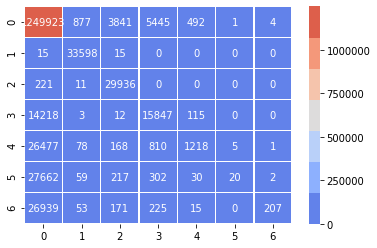

In [38]:
sns.heatmap(confusion_matrix(y_val, predictions), annot=True, fmt="d", linewidths=.5, cmap=cmap) 

In [34]:
pd.crosstab(y_val, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,6,All
True,,,,,,,,
0,1249923,877,3841,5445,492,1,4,1260583
1,15,33598,15,0,0,0,0,33628
2,221,11,29936,0,0,0,0,30168
3,14218,3,12,15847,115,0,0,30195
4,26477,78,168,810,1218,5,1,28757
5,27662,59,217,302,30,20,2,28292
6,26939,53,171,225,15,0,207,27610
All,1345455,34679,34360,22629,1870,26,214,1439233


#### Dumping model

In [31]:
import pickle

In [32]:
with open('../../src/models/Primer modelo basico - dummies.md', 'wb') as file:
    pickle.dump(rf, file, pickle.HIGHEST_PROTOCOL)

FileNotFoundError: [Errno 2] No such file or directory: '../../src/models/Primer modelo basico - dummies.md'